# Importando librerias
importando librerias y drive

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando os dados

In [ ]:
# importando data
df = pd.read_csv ('/content/drive/MyDrive/Projeto2-Hipoteses/dataset_spotify_2023.csv')
#df = pd.read_csv("/content/dataset_spotify2023.csv")

In [ ]:
df.head()

,track_id_atualizado,track_name_clean,artist_s__name_clean,count_songs,artist_count,released_year,released_month,released_day,data_de_lancamento,streams,...,terciles_energy__,categoria_energy,terciles_acousticness__,categoria_acousticness,terciles_instrumentalness__,categoria_instrumentalness,terciles_liveness__,categoria_liveness,terciles_speechiness__,categoria_speechiness
0,3126367,viva la vida,coldplay,3,1,2008,1,1,2008-01-01,1592909789,...,2,baixo,1,baixo,1,baixo,2,baixo,1,baixo
1,8502696,riptide,vance joy,1,1,1975,1,1,1975-01-01,2009094673,...,2,baixo,3,alto,1,baixo,2,baixo,1,baixo
2,6161550,cupid twin ver fifty fifty spe,sped up 8282,1,1,1997,1,1,1997-01-01,103762518,...,2,baixo,3,alto,2,baixo,1,baixo,1,baixo
3,8576945,rockin around the christmas tree,brenda lee,1,1,1958,1,1,1958-01-01,769213520,...,1,baixo,3,alto,1,baixo,3,alto,2,baixo
4,6372609,jingle bell rock,bobby helms,1,1,1957,1,1,1957-01-01,741301563,...,1,baixo,3,alto,1,baixo,1,baixo,1,baixo


# Análise exploratoria

In [ ]:
# Fazer uma cópia do dataframe df
df_copy = df.copy()
# numero de linhas e colunas
df_copy.shape

(948, 43)

In [ ]:
# resumo estatistico das variaveis numéricas
df_copy.loc[:, ['streams', 'count_songs']].describe()

,streams,count_songs
count,9.480000e+02,948.000000
mean,5.143365e+08,4.672996
std,5.677971e+08,7.631745
min,2.762000e+03,1.000000
25%,1.416362e+08,1.000000
50%,2.891651e+08,1.000000
75%,6.729425e+08,3.000000
max,3.703895e+09,34.000000


In [ ]:
# as dez artistas com mais musicas
df_copy['artist_s__name_clean'].value_counts().head(10)

artist_s__name_clean
taylor swift       34
the weeknd         21
sza                19
bad bunny          19
harry styles       17
kendrick lamar     12
morgan wallen      11
ed sheeran          9
drake 21 savage     8
feid                8
Name: count, dtype: int64

Text(0, 0.5, 'Número de músicas')

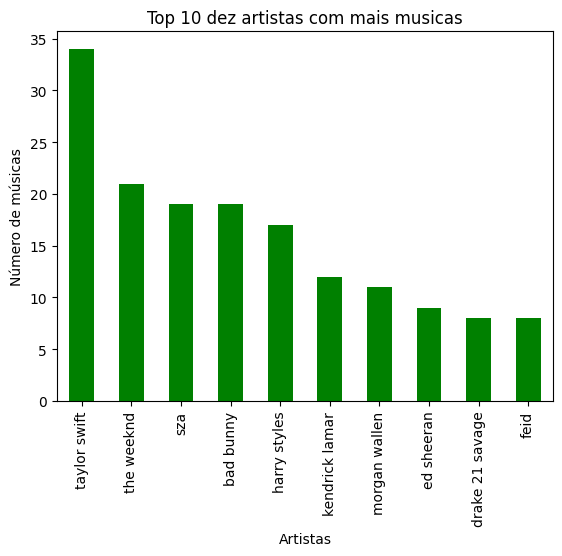

In [ ]:
# grafico de colunas - 10 artistas com mais musicas
ax = df_copy['artist_s__name_clean'].value_counts().head(10) \
    .plot(kind='bar', title='Top 10 dez artistas com mais musicas', color='green')
ax.set_xlabel('Artistas')
ax.set_ylabel('Número de músicas')

# **Teste estatístico**
O objetivo principal de um teste estatístico é determinar se um conjunto de dados observados é tão diferente do esperado na hipótese nula de forma que se deveria REJEITAR a hipótese nula.

# Histograma e Teste de normalidade da variável quantitativa "streams"

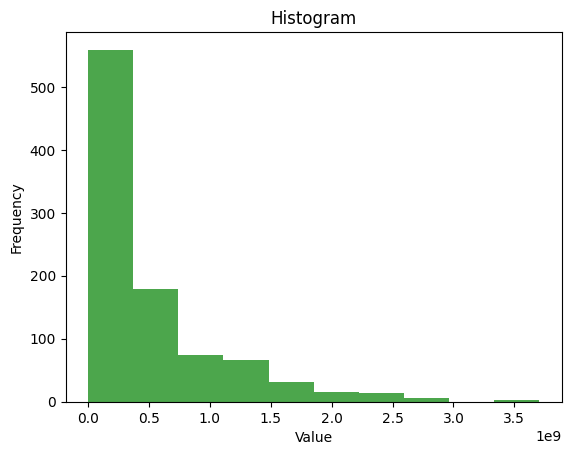

In [ ]:
# Cole ou digite aqui seu código de script:
import matplotlib.pyplot as plt
import pandas as pd
# Obtenha os dados do Power BI - você só preciso alterar essas informações de todo o code
data = df[['streams']]
# Crie o histograma
plt.hist(data, bins=10, color='green', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
# Mostre o histograma
plt.show()

### Testes de normalidade

### Testes de normalidade

In [ ]:
import pandas as pd
from scipy.stats import shapiro
variable = df["streams"]

# Suponiendo que tus datos están en una lista llamada 'data'
statistic, pvalue = shapiro(variable)

# Interpretación de resultados
if pvalue > 0.05:
  print("No hay evidencia para rechazar la normalidad (p-value:", pvalue, ").")
else:
  print("Los datos probablemente no siguen una distribución normal (p-value:", pvalue, ").")


Los datos probablemente no siguen una distribución normal (p-value: 6.377745045460244e-35 ).


### teste Kolgomorv-Smirnov

In [ ]:
from scipy.stats import kstest

# Suponiendo que la columna con los datos que deseas analizar se llama 'variable'
variable = df["streams"]

# Distribución de referencia (opcional)
distribucion_ref = "norm"  # Puedes cambiarla por la distribución que te interese

# Test de Kolmogorov-Smirnov
statistic, pvalue = kstest(variable, distribucion_ref)

# Interpretación de resultados
if pvalue > 0.05:
  print("No hay evidencia para rechazar la distribución de referencia (p-value:", pvalue, ").")
else:
  print("Los datos probablemente no siguen la distribución de referencia (p-value:", pvalue, ").")


Los datos probablemente no siguen la distribución de referencia (p-value: 0.0 ).


# Hipótese 1: Músicas com BPM (Batidas Por Minuto) mais altos fazem mais sucesso em termos de streams no Spotify

Test de hipótesis para datos no distribuidos en Python:
- Dado que los datos de la columna streams no siguen una distribución normal, como se puede observar en el Histograma(arriba). En este caso, lo más adecuado es utilizar una prueba no paramétrica, como la prueba de **Mann-Whitney U**.

**Problema:** Determinar si las músicas con BPM más altos logran más éxito en términos de streams.

**Variables:**
- streams: Variable numérica que representa la cantidad de streams de cada música.
- categoria_bpm: Variable cualitativa que clasifica las músicas en dos categorías: bajo y alto.

**Hipótesis:**

- **Hipótesis nula (H0):** No existe diferencia significativa en la cantidad de streams entre las músicas con BPM bajo y alta.
- **Hipótesis alternativa (H1):** Existe una diferencia significativa en la cantidad de streams entre las músicas con BPM bajo y alto, siendo las músicas con BPM más altos las que tienen más éxito en términnos de streams.

**Consideraciones:**
- Los datos no están distribuidos normalmente.
- Se utiliza un test no paramétrico de Mann-Whitney U que evalúa si hay diferencias significativas entre dos grupos independientes cuando los datos no están distribuidos normalmente, para comparar las distribuciones de streams entre las diferentes categorías de BPM.

**NOTA:**
La aplicación de un test estadístico sirve para verificar si los datos ofrecen evidencia suficiente para que se pueda aceptar como verdadera la hipótesis de investigación, teniendo en cuenta, con cierta seguridad, de qie las diferencias observadas en los datos no son meramente casuales.



In [ ]:
# Correlacao

X = df['bpm']
y = df['streams']

correlacao_bpm_streams = X.corr(y)

print("Correlação entre BPM e streams:", correlacao_bpm_streams)

Correlação entre BPM e streams: -0.0033105926438257737


In [ ]:
import pandas as pd
import scipy.stats as stats


# Realizamos el test de Mann-Whitney U
streams_bajo = df[df['categoria_bpm'] == 'baixo']['streams']
streams_alto = df[df['categoria_bpm'] == 'alto']['streams']

statistic, p_value = stats.mannwhitneyu(streams_bajo, streams_alto)

# Imprimimos el resultado
print("Estadística del test:", statistic)
print("Valor p-value:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas en los streams entre bpm 'bajo' y 'alto'.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre bpm 'bajo' y 'alto'.")


Estadística del test: 101771.5
Valor p-value: 0.6299027679552872
No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre bpm 'bajo' y 'alto'.


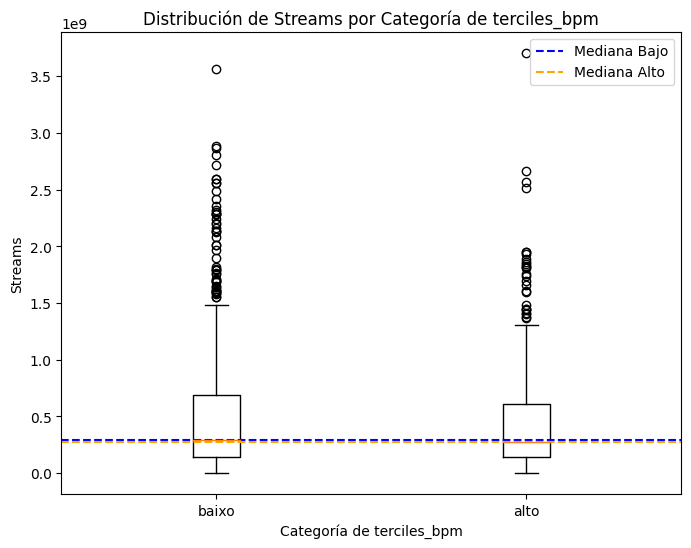

In [ ]:
import matplotlib.pyplot as plt

# Boxplot de los streams para cada categoría de terciles_bpm
plt.figure(figsize=(8, 6))
plt.boxplot([streams_bajo, streams_alto], labels=['baixo', 'alto'])

# Añadir una línea horizontal para mostrar la mediana de cada categoría
plt.axhline(y=streams_bajo.median(), color='blue', linestyle='--', label='Mediana Bajo')
plt.axhline(y=streams_alto.median(), color='orange', linestyle='--', label='Mediana Alto')

plt.xlabel('Categoría de terciles_bpm')
plt.ylabel('Streams')
plt.title('Distribución de Streams por Categoría de terciles_bpm')
plt.legend()
plt.show()


### **Conclusão:** Após análise e validação, constatou-se que essa hipótese não se confirma, sendo assim, foi **refutada**.

# Histograma e Teste de normalidade das variáveis "in_spotify_charts" e "in_deezer_charts"

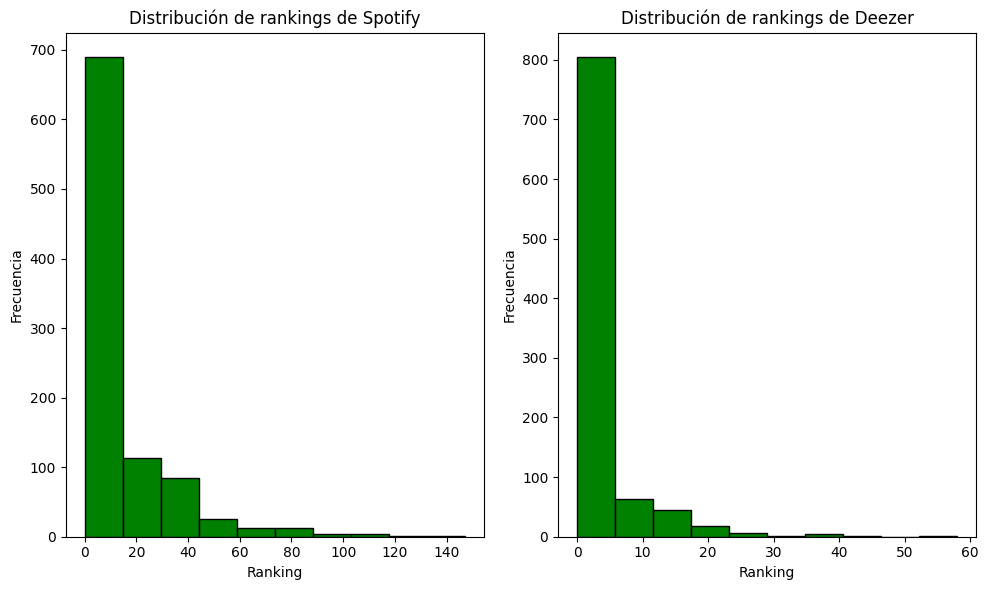

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Selección de datos por grupo
spotify_rank = df["in_spotify_charts"]
deezer_rank = df["in_deezer_charts"]

# Creación de histogramas
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(spotify_rank, bins=10, edgecolor="black", color="green")
plt.title("Distribución de rankings de Spotify")
plt.xlabel("Ranking")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(deezer_rank, bins=10, edgecolor="black", color="green")
plt.title("Distribución de rankings de Deezer")
plt.xlabel("Ranking")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

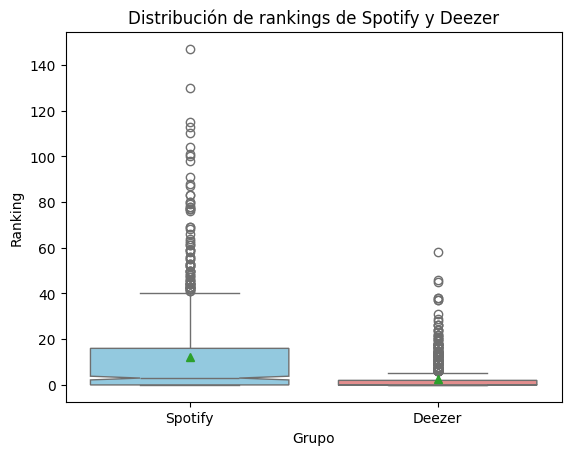

In [ ]:
import seaborn as sns
import pandas as pd

# Selección de datos por grupo
spotify_rank = df["in_spotify_charts"]
deezer_rank = df["in_deezer_charts"]

# Creación de diagramas de cajas
sns.boxplot(
    x="grupo",
    y="rank",
    showmeans=True,
    data=pd.DataFrame({"rank": spotify_rank, "grupo": "Spotify"}),
    color="skyblue",
    linewidth=1,
    notch=True,
)

sns.boxplot(
    x="grupo",
    y="rank",
    showmeans=True,
    data=pd.DataFrame({"rank": deezer_rank, "grupo": "Deezer"}),
    color="lightcoral",
    linewidth=1,
    notch=True,
)

plt.title("Distribución de rankings de Spotify y Deezer")
plt.xlabel("Grupo")
plt.ylabel("Ranking")
plt.show()

### Teste de Shapiro

In [ ]:
import pandas as pd
from scipy.stats import shapiro
variable = df["in_spotify_charts"]

# Suponiendo que tus datos están en una lista llamada 'data'
statistic, pvalue = shapiro(variable)

# Interpretación de resultados
if pvalue > 0.05:
  print("No hay evidencia para rechazar la normalidad (p-value:", pvalue, ").")
else:
  print("Los datos probablemente no siguen una distribución normal (p-value:", pvalue, ").")

Los datos probablemente no siguen una distribución normal (p-value: 1.85928904531549e-39 ).


In [ ]:
import pandas as pd
from scipy.stats import shapiro
variable = df["in_deezer_charts"]

# Suponiendo que tus datos están en una lista llamada 'data'
statistic, pvalue = shapiro(variable)

# Interpretación de resultados
if pvalue > 0.05:
  print("No hay evidencia para rechazar la normalidad (p-value:", pvalue, ").")
else:
  print("Los datos probablemente no siguen una distribución normal (p-value:", pvalue, ").")

Los datos probablemente no siguen una distribución normal (p-value: 2.802596928649634e-45 ).


### Teste de Kolgomorov

In [ ]:
from scipy.stats import kstest
# Suponiendo que la columna con los datos que deseas analizar se llama 'variable'
variable = df["in_spotify_charts"]

# Distribución de referencia (opcional)
distribucion_ref = "norm"  # Puedes cambiarla por la distribución que te interese

# Test de Kolmogorov-Smirnov
statistic, pvalue = kstest(variable, distribucion_ref)

# Interpretación de resultados
if pvalue > 0.05:
  print("No hay evidencia para rechazar la distribución de referencia (p-value:", pvalue, ").")
else:
  print("Los datos probablemente no siguen la distribución de referencia (p-value:", pvalue, ").")

Los datos probablemente no siguen la distribución de referencia (p-value: 1.2289180956425322e-257 ).


In [ ]:
from scipy.stats import kstest

# Suponiendo que la columna con los datos que deseas analizar se llama 'variable'
variable = df["in_deezer_charts"]

# Distribución de referencia (opcional)
distribucion_ref = "norm"  # Puedes cambiarla por la distribución que te interese

# Test de Kolmogorov-Smirnov
statistic, pvalue = kstest(variable, distribucion_ref)

# Interpretación de resultados
if pvalue > 0.05:
  print("No hay evidencia para rechazar la distribución de referencia (p-value:", pvalue, ").")
else:
  print("Los datos probablemente no siguen la distribución de referencia (p-value:", pvalue, ").")

Los datos probablemente no siguen la distribución de referencia (p-value: 1.1173873885458578e-219 ).


# Hipótese 2: As músicas mais populares no ranking do Spotify também possuem um comportamento semelhante em outras plataformas como Deezer e Apple


Para analizar si las canciones más populares en Spotify también son populares en Deezer, dado que los datos no siguen una distribución normal, se puede utilizar una prueba no paramétrica como la prueba de Correlación de Spearman, por ser variables que tienen un nivel de medición ordinal correspondiente a Rankings.

**Problema:** Determinar si las músicas más populares en el ranking de Spotify también poseen un comportamiento semejante en otras plataformas como Deezer y Apple.




In [ ]:
#correlacao

X1 = df['in_spotify_charts']
X2 = df['in_apple_charts']
y = df['in_deezer_charts']

# Calculando a correlação entre in_spotify_charts e in_deezer_charts
correlacao_spotify_deezer = X1.corr(y)

# Calculando a correlação entre in_spotify_charts e in_apple_charts
correlacao_spotify_apple = X1.corr(X2)

print("Correlação entre Spotify e Deezer:", correlacao_spotify_deezer)
print("Correlação entre Spotify e Apple:", correlacao_spotify_apple)

Correlação entre Spotify e Deezer: 0.6000532923478681
Correlação entre Spotify e Apple: 0.55185906295577


## Test para las variables "in_spotify_charts" e "in_deezer_charts"

**Variables:**
- streams: Variable numérica que representa la cantidad de streams de cada música.
- terciles_bpm: Variable cualitativa que clasifica las músicas en dos categorías: bajo y alto.

**Hipótesis:**

- **Hipótesis nula (H0):** No existe una correlación significativa entre los rankings de Spotify y Deezer.
- **Hipótesis alternativa (H1):** Existe una correlación significativa entre los rankings de Spotify y Deezer.

**Consideraciones:**
- Los datos no están distribuidos normalmente.
- Si el valor p es menor que el nivel de significancia, se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Esto significa que hay evidencia suficiente para afirmar que existe una correlación significativa entre los rankings de Spotify y Deezer.
- Si el valor p es mayor o igual que el nivel de significancia, no se rechaza la hipótesis nula y no se acepta la hipótesis alternativa. Esto significa que no hay evidencia suficiente para afirmar que existe una correlación significativa entre los rankings de Spotify y Deezer.

####  test de hipótesis llamado test de correlación de Spearman

In [ ]:
import pandas as pd
from scipy.stats import spearmanr


# Selección de columnas
spotify_rank = df["in_spotify_charts"]
deezer_rank = df["in_deezer_charts"]

# Prueba de Spearman's rank correlation
correlation_coefficient, pvalue = spearmanr(spotify_rank, deezer_rank)

# Interpretación de resultados
if pvalue < 0.05:
  print("Existe una correlación significativa entre los rankings de Spotify y Deezer (coeficiente de correlación:", correlation_coefficient, ", p-value:", pvalue, ").")
else:
  print("No hay evidencia suficiente para afirmar que existe una correlación significativa entre los rankings de Spotify y Deezer (coeficiente de correlación:", correlation_coefficient, ", p-value:", pvalue, ").")




Existe una correlación significativa entre los rankings de Spotify y Deezer (coeficiente de correlación: 0.5900663658867531 , p-value: 5.309451108676141e-90 ).


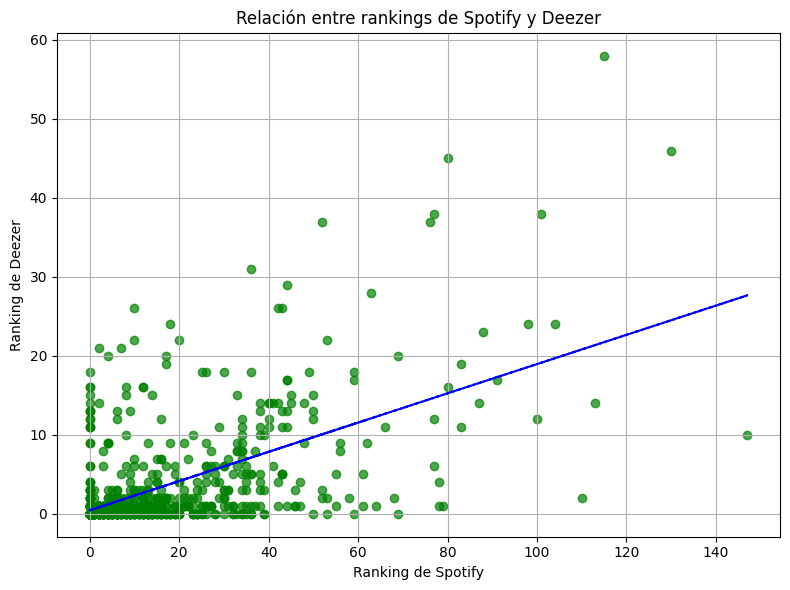

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Selección de datos
spotify_rank = df["in_spotify_charts"]
deezer_rank = df["in_deezer_charts"]

# Creación del diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(spotify_rank, deezer_rank, color="green", alpha=0.7)
plt.title("Relación entre rankings de Spotify y Deezer")
plt.xlabel("Ranking de Spotify")
plt.ylabel("Ranking de Deezer")

# Añadir línea de regresión (opcional)
m, b = np.polyfit(spotify_rank, deezer_rank, 1)
plt.plot(spotify_rank, m * spotify_rank + b, color="blue", linestyle="--")

plt.grid(True)
plt.tight_layout()
plt.show()


## Test para las variables "in_spotify_charts" e "in_apple_charts"

**Variables:**
- streams: Variable numérica que representa la cantidad de streams de cada música.
- terciles_bpm: Variable cualitativa que clasifica las músicas en dos categorías: bajo y alto.

**Hipótesis:**

- **Hipótesis nula (H0):** No existe una correlación significativa entre los rankings de Spotify y Apple.
- **Hipótesis alternativa (H1):** Existe una correlación significativa entre los rankings de Spotify y Apple.

**Consideraciones:**
- Los datos no están distribuidos normalmente.
- Si el valor p es menor que el nivel de significancia, se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Esto significa que hay evidencia suficiente para afirmar que existe una correlación significativa entre los rankings de Spotify y Apple.
- Si el valor p es mayor o igual que el nivel de significancia, no se rechaza la hipótesis nula y no se acepta la hipótesis alternativa. Esto significa que no hay evidencia suficiente para afirmar que existe una correlación significativa entre los rankings de Spotify y Apple.


####  test de hipótesis llamado test de correlación de Spearman

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Selección de columnas
spotify_rank = df["in_spotify_charts"]
deezer_rank = df["in_apple_charts"]

# Prueba de Spearman's rank correlation
correlation_coefficient, pvalue = spearmanr(spotify_rank, deezer_rank)

# Interpretación de resultados
if pvalue < 0.05:
  print("Existe una correlación significativa entre los rankings de Spotify y Apple (coeficiente de correlación:", correlation_coefficient, ", p-value:", pvalue, ").")
else:
  print("No hay evidencia suficiente para afirmar que existe una correlación significativa entre los rankings de Spotify y Apple (coeficiente de correlación:", correlation_coefficient, ", p-value:", pvalue, ").")

Existe una correlación significativa entre los rankings de Spotify y Apple (coeficiente de correlación: 0.520808671061685 , p-value: 4.9887224722760026e-67 ).


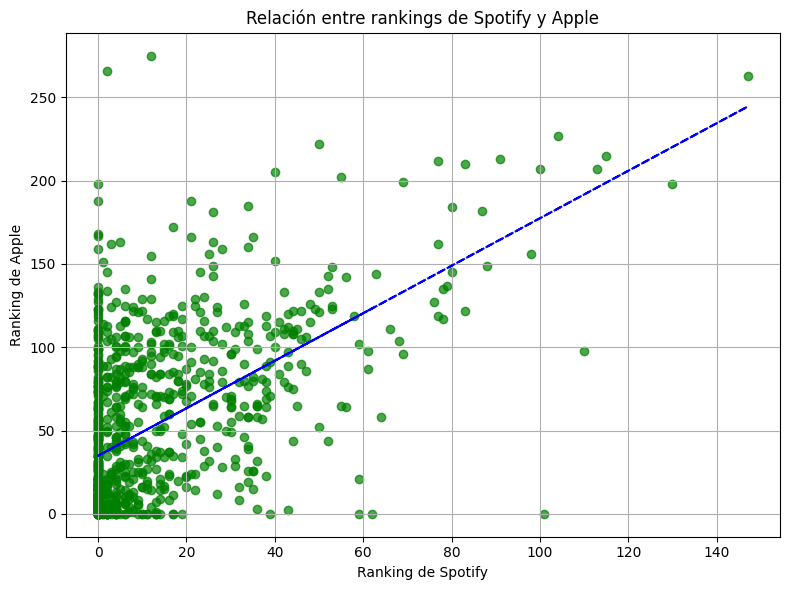

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Selección de datos
spotify_rank = df["in_spotify_charts"]
deezer_rank = df["in_apple_charts"]

# Creación del diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(spotify_rank, deezer_rank, color="green", alpha=0.7)
plt.title("Relación entre rankings de Spotify y Apple")
plt.xlabel("Ranking de Spotify")
plt.ylabel("Ranking de Apple")

# Añadir línea de regresión (opcional)
m, b = np.polyfit(spotify_rank, deezer_rank, 1)
plt.plot(spotify_rank, m * spotify_rank + b, color="blue", linestyle="--")

plt.grid(True)
plt.tight_layout()
plt.show()

## **Conclusão:** Após uma análise dos resultados, identificou-se que esta hipótese foi **confirmada**.

# Histograma e Teste de normalidade das variaves "total_participation_in_playlist" e "streams"

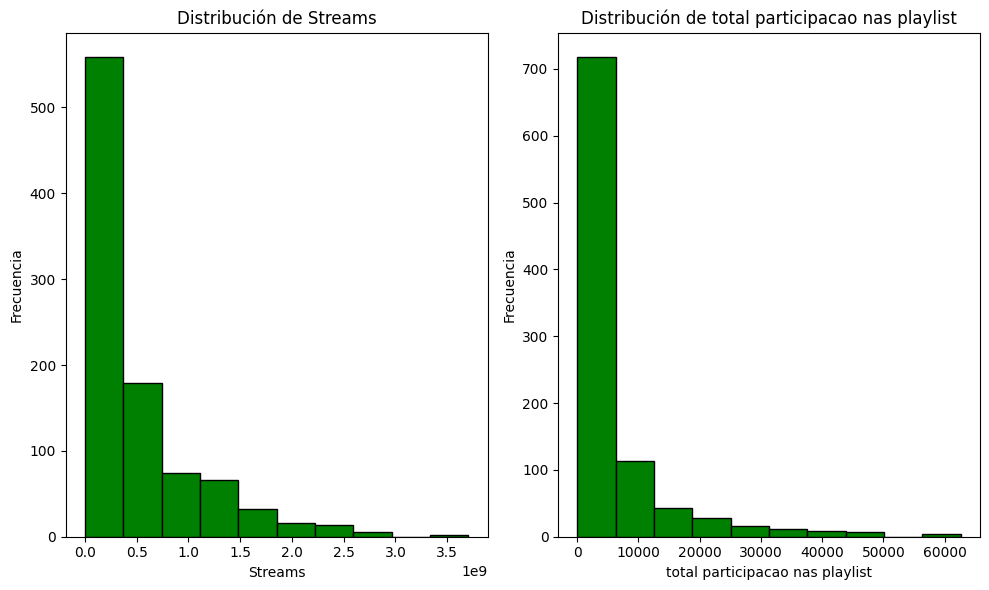

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Selección de datos por grupo
spotify_rank = df["streams"]
deezer_rank = df["total_participation_in_playlist"]

# Creación de histogramas
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(spotify_rank, bins=10, edgecolor="black", color ="green")
plt.title("Distribución de Streams")
plt.xlabel("Streams")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(deezer_rank, bins=10, edgecolor="black", color ="green")
plt.title("Distribución de total participacao nas playlist")
plt.xlabel("total participacao nas playlist")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### Teste de Shapiro

In [ ]:
import pandas as pd
from scipy.stats import shapiro
variable = df["streams"]

# Suponiendo que tus datos están en una lista llamada 'data'
statistic, pvalue = shapiro(variable)

# Interpretación de resultados
if pvalue > 0.05:
  print("No hay evidencia para rechazar la normalidad (p-value:", pvalue, ").")
else:
  print("Los datos probablemente no siguen una distribución normal (p-value:", pvalue, ").")

Los datos probablemente no siguen una distribución normal (p-value: 6.377745045460244e-35 ).


In [ ]:
import pandas as pd
from scipy.stats import shapiro
variable = df["total_participation_in_playlist"]

# Suponiendo que tus datos están en una lista llamada 'data'
statistic, pvalue = shapiro(variable)

# Interpretación de resultados
if pvalue > 0.05:
  print("No hay evidencia para rechazar la normalidad (p-value:", pvalue, ").")
else:
  print("Los datos probablemente no siguen una distribución normal (p-value:", pvalue, ").")

Los datos probablemente no siguen una distribución normal (p-value: 6.768271582688866e-42 ).


# Hipótese 3: A presença de uma música em um maior número de playlists é relacionada a um maior número de streams

Para determinar si la presencia de una canción en un mayor número de listas de reproducción está relacionada con un mayor número de streams, podemos utilizar un test de correlación. Dado que estamos interesadas en verificar la relación entre dos variables numéricas, podríamos aplicar el coeficiente de correlación de Pearson.

**Hipótesis nula (H0):**  No hay relación entre la presencia en un mayor número de listas de reproducción y un mayor número de streams.

**Hipótesis alternativa (H1):** Existe una relación entre la presencia en un mayor número de listas de reproducción y un mayor número de streams.

In [ ]:
#Coeficiente de correlacao de Pearson

X1 = df['streams']
y = df['total_participation_in_playlist']

# Calculando a correlação entre streams e total_participation_in_playlist
correlacao_streams_playlist = X1.corr(y)

print("Correlação entre total participacao nas playlist e streams:", correlacao_streams_playlist)


Correlação entre total participacao nas playlist e streams: 0.7835372823802433


In [ ]:
import pandas as pd
import scipy.stats as stats

# Realizamos el test de correlación de Spearman
correlation, p_value = stats.spearmanr(df['total_participation_in_playlist'], df['streams'])

# Imprimimos el resultado
print("Coeficiente de correlación de Spearman:", correlation)
print("Valor p:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa entre la presencia en listas de reproducción y el número de streams.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar una correlación significativa entre la presencia en listas de reproducción y el número de streams.")



Coeficiente de correlación de Spearman: 0.8348451730971362
Valor p: 1.7265274903806566e-247
Se rechaza la hipótesis nula. Hay una correlación significativa entre la presencia en listas de reproducción y el número de streams.


### diagrama de dispersión
Este código generará un diagrama de dispersión donde el eje x representa la presencia en listas de reproducción y el eje y representa el número de streams. Cada punto en el gráfico representa una canción, y su posición en el gráfico muestra su nivel de participación en listas de reproducción y el número de streams correspondiente. Si hay una relación entre las dos variables, podrías observar una tendencia o un patrón en la dispersión de los puntos.







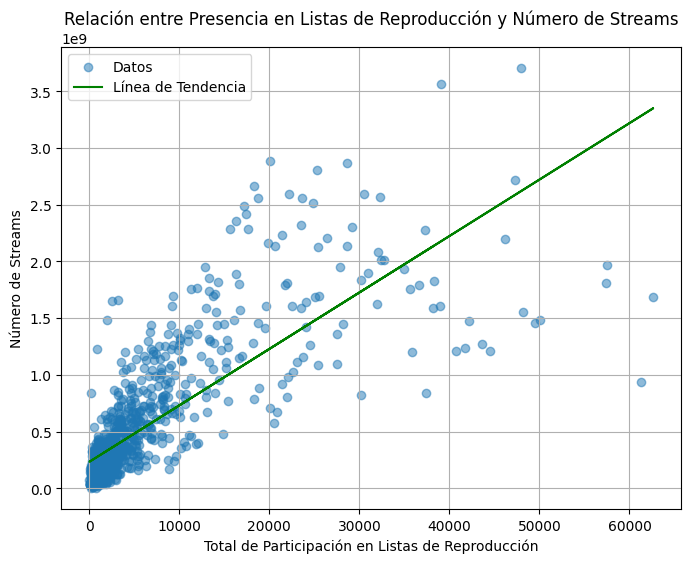

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustamos una línea de regresión lineal a los datos
coefficients = np.polyfit(df['total_participation_in_playlist'], df['streams'], 1)
m = coefficients[0]  # Pendiente
b = coefficients[1]  # Intercepto

# Graficamos el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['total_participation_in_playlist'], df['streams'], alpha=0.5, label='Datos')

# Añadimos la línea de regresión lineal al gráfico
plt.plot(df['total_participation_in_playlist'], m * df['total_participation_in_playlist'] + b, color='green', label='Línea de Tendencia')

plt.title('Relación entre Presencia en Listas de Reproducción y Número de Streams')
plt.xlabel('Total de Participación en Listas de Reproducción')
plt.ylabel('Número de Streams')
plt.legend()
plt.grid(True)
plt.show()


**Conclusão:** Após as análises, confirmou-se que a presença de uma música em um maior número de playlists está, de fato, correlacionada com um aumento significativo no número de streams. Essa relação evidência a importância das playlists como um dos principais impulsionadores de sucesso para as músicas no ambiente de streaming, portanto, essa hipótese foi **validada**.

# Teste de normalidade da variável quantitativa "streams"

In [ ]:
import pandas as pd
from scipy.stats import shapiro
variable = df["streams"]

# Suponiendo que tus datos están en una lista llamada 'df'
statistic, pvalue = shapiro(variable)

# Interpretación de resultados
if pvalue > 0.05:
  print("No hay evidencia para rechazar la normalidad (p-value:", pvalue, ").")
else:
  print("Los datos probablemente no siguen una distribución normal (p-value:", pvalue, ").")

# Hipótese 4: Artistas com maior número de músicas no Spotify têm mais streams

Para responder a la pregunta sobre si los artistas con más canciones en Spotify son los que más streams tienen y dado que los datos no están distribuidos normalmente, una opción más adecuada podría ser utilizar un coeficiente de correlación no paramétrico, como el coeficiente de correlación de Spearman.

**Hipótesis:**

- **Hipótesis nula (H0):** No hay relación entre el número de canciones y el número de streams.
- **Hipótesis alternativa (H1):** Existe una relación entre el número de canciones y el número de streams.

**Consideraciones:**
- El test de Spearman's rank correlation es una prueba no paramétrica que no asume normalidad en los datos.
- La interpretación de la correlación debe hacerse con cuidado, ya que no implica necesariamente causalidad.

In [ ]:
import pandas as pd
import scipy.stats as stats


# importando data
data = pd.read_csv ('/content/drive/MyDrive/Projeto2-Hipoteses/artist_songs.csv')

X = data['total_musicas']
y = data['total_streams']

correlacao_total_musicas_streams = X.corr(y)

print("Correlação entre total_musicas e streams:", correlacao_total_musicas_streams)

Correlação entre total_musicas e streams: 0.7789441982622838


In [ ]:
from typing_extensions import dataclass_transform
import pandas as pd
import scipy.stats as stats

# importando data
data = pd.read_csv ('/content/drive/MyDrive/Projeto2-Hipoteses/artist_songs.csv')

# Realizamos el test de correlación de Spearman
correlation, p_value = stats.spearmanr(data['total_musicas'], data['total_streams'])

# Imprimimos el resultado
print("Coeficiente de correlación de Spearman:", correlation)
print("Valor p:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa entre el número de canciones y el número de streams.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para afirmar una correlación significativa entre el número de canciones y el número de streams.")


Coeficiente de correlación de Spearman: 0.4479217046127495
Valor p: 4.2222214971206745e-33
Se rechaza la hipótesis nula. Hay una correlación significativa entre el número de canciones y el número de streams.


### diagrama de dispersión
Este código generará un diagrama de dispersión donde el eje x representa el total de musicas por artista y el eje y representa el número de streams. Cada punto en el gráfico representa una canción, y su posición en el gráfico muestra la cantidad de canciones del artista y el número de streams correspondiente. Si hay una relación entre las dos variables, podrías observar una tendencia o un patrón en la dispersión de los puntos.


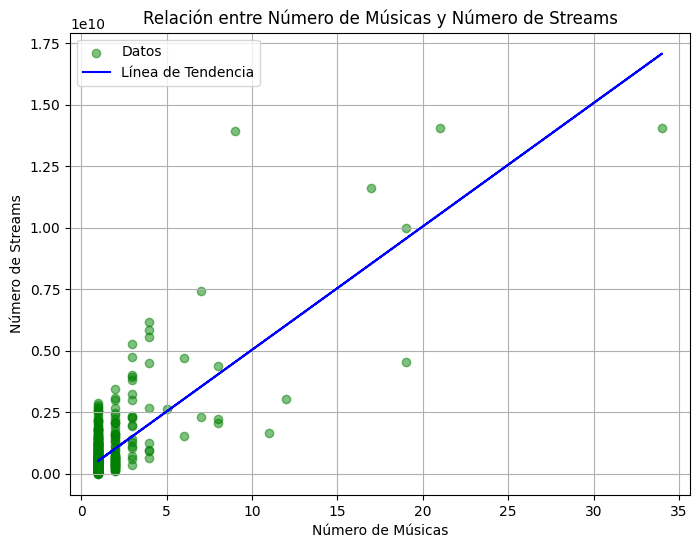

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustamos una línea de regresión lineal a los datos
coefficients = np.polyfit(data['total_musicas'], data['total_streams'], 1)
m = coefficients[0]  # Pendiente
b = coefficients[1]  # Intercepto

# Graficamos el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data['total_musicas'], data['total_streams'], alpha=0.5, label='Datos', color = 'green')

# Añadimos la línea de regresión lineal al gráfico
plt.plot(data['total_musicas'], m * data['total_musicas'] + b, color='blue', label='Línea de Tendencia')

plt.title('Relación entre Número de Músicas y Número de Streams')
plt.xlabel('Número de Músicas')
plt.ylabel('Número de Streams')
plt.legend()
plt.grid(True)
plt.show()



### **Conclusão:** Após análise realizada, foi validado que esta hipótese se confirma. Os resultados obtidos demonstram uma correlação positiva entre o número de músicas disponíveis de um artista no Spotify e o total de streams acumulados. Essa relação destaca a importância da disponibilidade do catálogo de um artista para o sucesso na plataforma de streaming.

# Hipótese 5: As características da música influenciam no sucesso em termos de streams no Spotify

In [ ]:
colunas = ['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'streams']
dados_selecionados = df[colunas]

# Calculando a matriz de correlação
matriz_correlacao = dados_selecionados.corr()

# Extraindo apenas as correlações com os streams
correlacoes_streams = matriz_correlacao['streams']

print("Correlação entre as variáveis e os streams:")
print(correlacoes_streams)

Correlação entre as variáveis e os streams:
danceability__       -0.105492
valence__            -0.041505
energy__             -0.025414
acousticness__       -0.005061
instrumentalness__   -0.044892
liveness__           -0.049473
speechiness__        -0.112795
streams               1.000000
Name: streams, dtype: float64


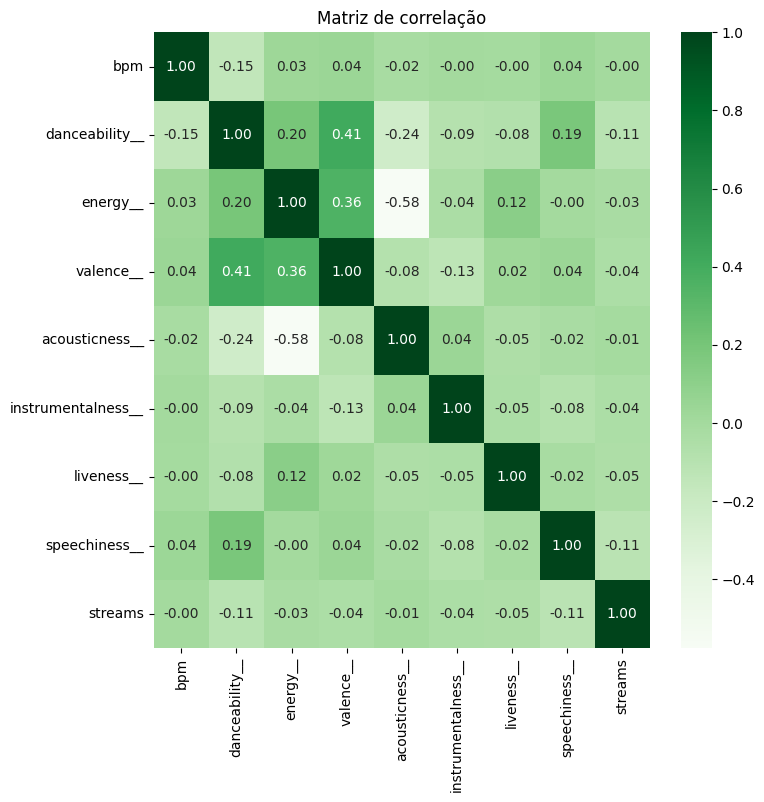

In [ ]:
#MATRIZ DE CORRELAÇÃO

# Selecionando as colunas relevantes para calcular a matriz de correlação
cols = ['bpm', 'danceability__', 'energy__', 'valence__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'streams']
correlation_matrix = df[cols].corr()

# Mapa de calor
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens')  # Alterado para mapa de cores 'Greens'
plt.title('Matriz de correlação')
plt.show()

**Conclusão:** Na análise de correlação, observamos que todas as características das músicas demonstraram uma correlação negativa fraca, sugerindo que essas variáveis podem não ter uma influência significativa nos streams. No entanto, durante o teste de significância, foi observada uma diferença significativa apenas na variável "danceability". Portanto, concluiu- se que a hipótese foi rejeitada.

## danceability
Para analizar si las características de la música, en este caso la categoría de "danceability" (baja o alta), influyen en el éxito en términos de streams en Spotify, se puedes aplicar un test de hipótesis conocido como el test de Mann-Whitney U. Este test es apropiado cuando tienes dos grupos (en este caso, "baja" y "alta" danceability) y se quieres comparar si hay diferencias en una variable numérica (streams) entre los dos grupos, especialmente cuando los datos no están distribuidos normalmente.

**Hipótesis:**

- **Hipótesis nula (H0):**  No hay diferencias significativas en los streams entre las categorías de "baja" y "alta" danceability.
- **Hipótesis alternativa (H1):** Hay diferencias significativas en los streams entre las categorías de "baja" y "alta" danceability.

**Consideraciones:**
- Se aplicará el test de Mann-Whitney U para comparar si hay diferencias significativas en los streams entre las categorías de "baja" y "alta" danceability. Si el valor p resultante es menor que el nivel de significancia (usualmente 0.05), se rechaza la hipótesis nula, lo que indica que hay diferencias significativas en los streams entre las dos categorías de danceability. De lo contrario, si el valor p es mayor que el nivel de significancia, no hay suficiente evidencia para afirmar que hay diferencias significativas.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Supongamos que 'categoria_danceability' es la columna para la categoría de danceability ('baja' o 'alta')
# y 'streams' es la columna para el número de streams

# Dividimos los datos en dos grupos según la categoría de danceability
streams_baja = df[df['categoria_danceability'] == 'baixo']['streams']
streams_alta = df[df['categoria_danceability'] == 'alto']['streams']

# Realizamos el test de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(streams_baja, streams_alta)

# Imprimimos el resultado
print("Estadística del test:", statistic)
print("Valor p:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' danceability.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' danceability.")


Estadística del test: 107690.0
Valor p: 0.04871107329863336
Se rechaza la hipótesis nula. Hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' danceability.


#### Interpretación:

Como el valor p (0.0487) es menor que el nivel de significancia comúnmente utilizado de 0.05, podemos decir que hay evidencia estadística suficiente para rechazar la hipótesis nula.
Por lo tanto, podemos concluir que hay diferencias significativas en los streams entre las categorías de "baja" y "alta" danceability.

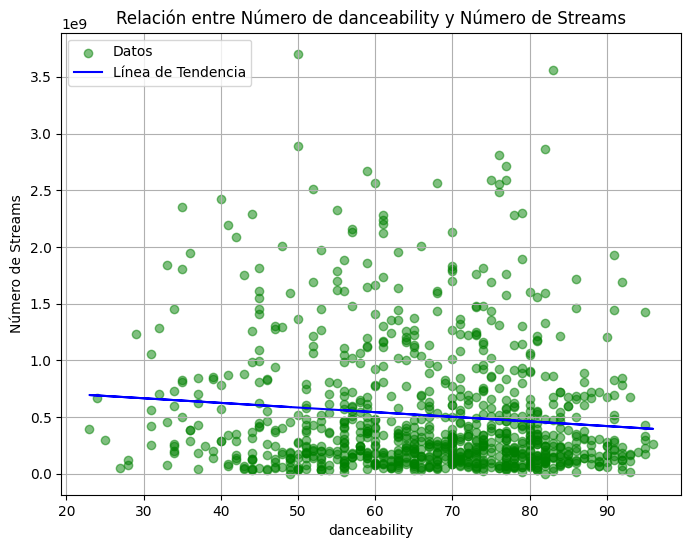

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustamos una línea de regresión lineal a los datos
coefficients = np.polyfit(df['danceability__'], df['streams'], 1)
m = coefficients[0]  # Pendiente
b = coefficients[1]  # Intercepto

# Graficamos el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['danceability__'], df['streams'], alpha=0.5, label='Datos', color = 'green')

# Añadimos la línea de regresión lineal al gráfico
plt.plot(df['danceability__'], m * df['danceability__'] + b, color='blue', label='Línea de Tendencia')

plt.title('Relación entre Número de danceability y Número de Streams')
plt.xlabel('danceability')
plt.ylabel('Número de Streams')
plt.legend()
plt.grid(True)
plt.show()

## valence
Dado que los datos no están distribuidos normalmente y se quiere determinar si las características de la música, en este caso la categoría de "valencia" (baja o alta), influyen en el éxito en términos de streams en Spotify, se puede aplicar un test no paramétrico llamado test de Mann-Whitney U. Este test es apropiado cuando se tienen dos grupos (en este caso, "baja" y "alta" valencia) y se quiere comparar si hay diferencias en una variable numérica (streams) entre los dos grupos.


En el contexto del test de Mann-Whitney U, las hipótesis son las siguientes:

**Hipótesis nula (H0):** No hay diferencias significativas en los streams entre las categorías de "baja" y "alta" valencia.

**Hipótesis alternativa (H1):** Hay diferencias significativas en los streams entre las categorías de "baja" y "alta" valencia.

**Cosideraciones:** Se aplicará el test de Mann-Whitney U para comparar si hay diferencias significativas en los streams entre las categorías de "baja" y "alta" energía. Si el valor p resultante es menor que el nivel de significancia (usualmente 0.05), se rechaza la hipótesis nula, lo que indica que hay diferencias significativas en los streams entre las dos categorías de energía. De lo contrario, si el valor p es mayor que el nivel de significancia, no hay suficiente evidencia para afirmar que hay diferencias significativas.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Dividimos los datos en dos grupos según la categoría de valencia
streams_baja = df[df['categoria_valence'] == 'baixo']['streams']
streams_alta = df[df['categoria_valence'] == 'alto']['streams']

# Realizamos el test de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(streams_baja, streams_alta)

# Imprimimos el resultado
print("Estadística del test:", statistic)
print("Valor p:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' valencia.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' valencia.")


Estadística del test: 103892.5
Valor p: 0.30983783400297915
No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' valencia.


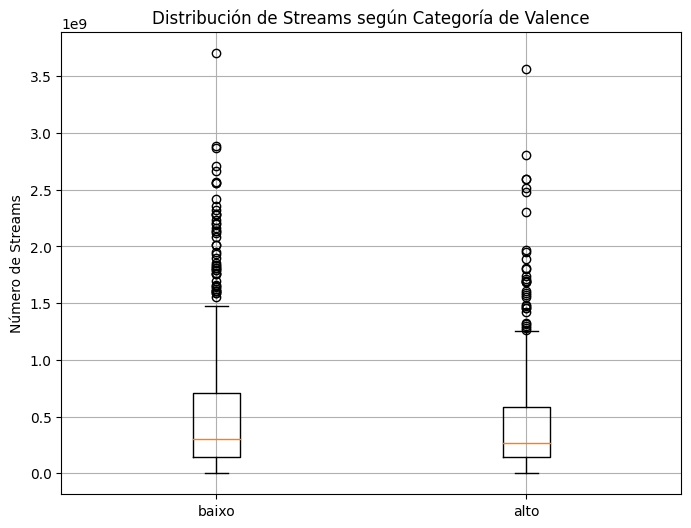

In [ ]:
import matplotlib.pyplot as plt

# Graficamos el diagrama de cajas
plt.figure(figsize=(8, 6))
plt.boxplot([streams_baja, streams_alta], labels=['baixo', 'alto'])
plt.title('Distribución de Streams según Categoría de Valence')
plt.ylabel('Número de Streams')
plt.grid(True)
plt.show()


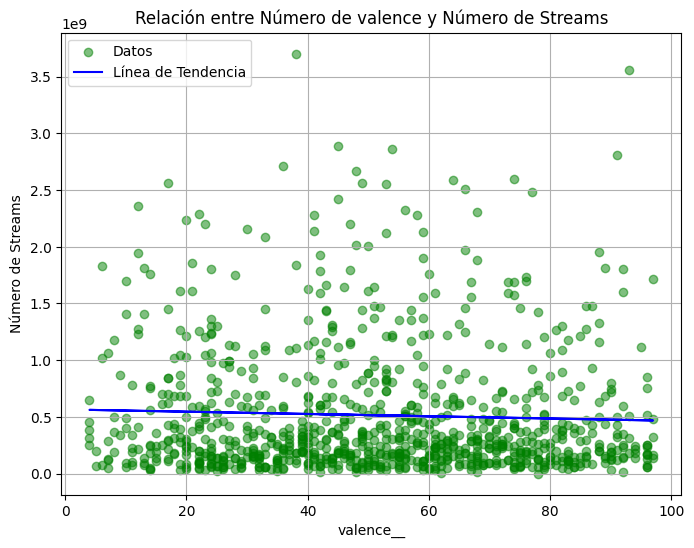

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustamos una línea de regresión lineal a los datos
coefficients = np.polyfit(df['valence__'], df['streams'], 1)
m = coefficients[0]  # Pendiente
b = coefficients[1]  # Intercepto

# Graficamos el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['valence__'], df['streams'], alpha=0.5, label='Datos', color = 'green')

# Añadimos la línea de regresión lineal al gráfico
plt.plot(df['valence__'], m * df['valence__'] + b, color='blue', label='Línea de Tendencia')

plt.title('Relación entre Número de valence y Número de Streams')
plt.xlabel('valence__')
plt.ylabel('Número de Streams')
plt.legend()
plt.grid(True)
plt.show()

## energy
Dado que los datos no están distribuidos normalmente y deseas determinar si las características de la música, en este caso la categoría de "energía" (baja o alta), influyen en el éxito en términos de streams en Spotify, se puede aplicar un test no paramétrico llamado test de Mann-Whitney U. Este test es apropiado cuando se tiene dos grupos (en este caso, "baja" y "alta" energía) y se quiere comparar si hay diferencias en una variable numérica (streams) entre los dos grupos.

**Hipótesis nula (H0):** No hay diferencias significativas en los streams entre las categorías de "baja" y "alta" energía.

**Hipótesis alternativa (H1):** Hay diferencias significativas en los streams entre las categorías de "baja" y "alta" energía.

**Consideraciones:**
- El test de Mann-Whitney U es una prueba no paramétrica que no asume normalidad en los datos ni homocedasticidad (igualdad de varianzas) entre las poblaciones.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Dividimos los datos en dos grupos según la categoría de energía
streams_baja = df[df['categoria_energy'] == 'baixo']['streams']
streams_alta = df[df['categoria_energy'] == 'alto']['streams']

# Realizamos el test de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(streams_baja, streams_alta)

# Imprimimos el resultado
print("Estadística del test:", statistic)
print("Valor p:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' energía.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' energía.")

Estadística del test: 105158.0
Valor p: 0.18220549024289856
No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' energía.


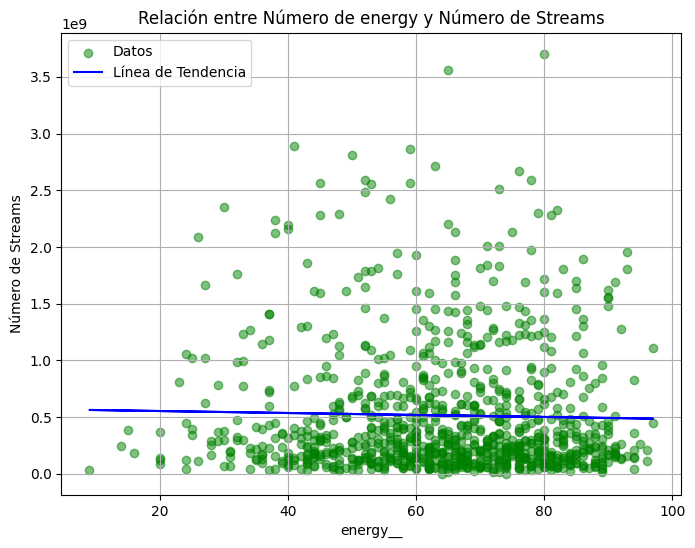

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustamos una línea de regresión lineal a los datos
coefficients = np.polyfit(df['energy__'], df['streams'], 1)
m = coefficients[0]  # Pendiente
b = coefficients[1]  # Intercepto

# Graficamos el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['energy__'], df['streams'], alpha=0.5, label='Datos', color = 'green')

# Añadimos la línea de regresión lineal al gráfico
plt.plot(df['energy__'], m * df['energy__'] + b, color='blue', label='Línea de Tendencia')

plt.title('Relación entre Número de energy y Número de Streams')
plt.xlabel('energy__')
plt.ylabel('Número de Streams')
plt.legend()
plt.grid(True)
plt.show()

## acousticness
Dado que los datos no están distribuidos normalmente y se desea determinar si las características de la música, en este caso la categoría de "acousticness" (baja o alta), influyen en el éxito en términos de streams en Spotify, se puede aplicar un test no paramétrico llamado test de Mann-Whitney U. Este test es apropiado cuando se tienes dos grupos (en este caso, "baja" y "alta" acousticness) y se quiere comparar si hay diferencias en una variable numérica (streams) entre los dos grupos.

**Hipótesis nula (H0):** No hay diferencias significativas en los streams entre las categorías de "baja" y "alta" acousticness.

**Hipótesis alternativa (H1):** Hay diferencias significativas en los streams entre las categorías de "baja" y "alta" acousticness.

**Consideraciones**: Este código calculará el test de Mann-Whitney U para comparar si hay diferencias significativas en los streams entre las categorías de "baja" y "alta" acousticness. Si el valor p resultante es menor que el nivel de significancia (usualmente 0.05), se rechaza la hipótesis nula, lo que indica que hay diferencias significativas en los streams entre las dos categorías de acousticness. De lo contrario, si el valor p es mayor que el nivel de significancia, no hay suficiente evidencia para afirmar que hay diferencias significativas.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Dividimos los datos en dos grupos según la categoría de acousticness
streams_baja = df[df['categoria_acousticness'] == 'baixo']['streams']
streams_alta = df[df['categoria_acousticness'] == 'alto']['streams']

# Realizamos el test de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(streams_baja, streams_alta)

# Imprimimos el resultado
print("Estadística del test:", statistic)
print("Valor p:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' acousticness.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' acousticness.")


Estadística del test: 102795.0
Valor p: 0.4596623958829966
No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' acousticness.


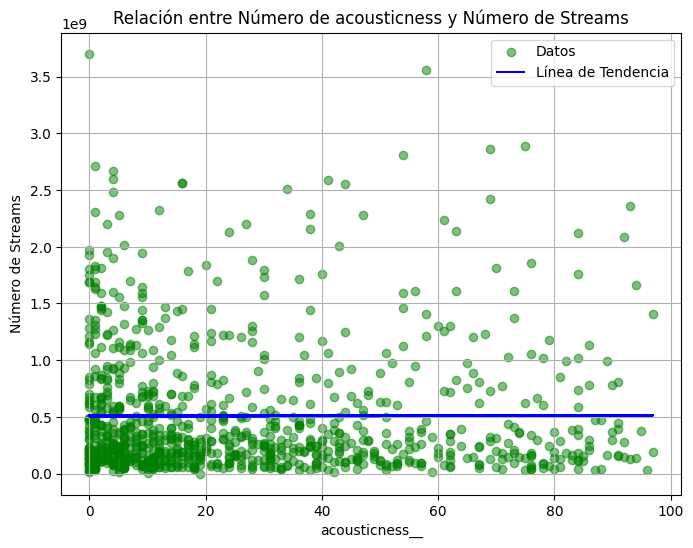

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustamos una línea de regresión lineal a los datos
coefficients = np.polyfit(df['acousticness__'], df['streams'], 1)
m = coefficients[0]  # Pendiente
b = coefficients[1]  # Intercepto

# Graficamos el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['acousticness__'], df['streams'], alpha=0.5, label='Datos', color = 'green')

# Añadimos la línea de regresión lineal al gráfico
plt.plot(df['acousticness__'], m * df['energy__'] + b, color='blue', label='Línea de Tendencia')

plt.title('Relación entre Número de acousticness y Número de Streams')
plt.xlabel('acousticness__')
plt.ylabel('Número de Streams')
plt.legend()
plt.grid(True)
plt.show()

## instrumentalness
Dado que los datos no están distribuidos normalmente y se desea determinar si las características de la música, en este caso la categoría de "instrumentalness" (baja o alta), influyen en el éxito en términos de streams en Spotify, puedes aplicar un test no paramétrico llamado test de Mann-Whitney U. Este test es apropiado cuando se tiene dos grupos (en este caso, "baja" y "alta" instrumentalness) y quieres comparar si hay diferencias en una variable numérica (streams) entre los dos grupos.

**Hipótesis nula (H0):** No hay diferencias significativas en los streams entre las categorías de "baja" y "alta" instrumentalness.

**Hipótesis alternativa (H1):** Hay diferencias significativas en los streams entre las categorías de "baja" y "alta" instrumentalness.

**Consideraciones:**
- Este código calculará el test de Mann-Whitney U para comparar si hay diferencias significativas en los streams entre las categorías de "baja" y "alta" instrumentalness. Si el valor p resultante es menor que el nivel de significancia (usualmente 0.05), se rechaza la hipótesis nula, lo que indica que hay diferencias significativas en los streams entre las dos categorías de instrumentalness. De lo contrario, si el valor p es mayor que el nivel de significancia, no hay suficiente evidencia para afirmar que hay diferencias significativas.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Dividimos los datos en dos grupos según la categoría de instrumentalness
streams_baja = df[df['categoria_instrumentalness'] == 'baixo']['streams']
streams_alta = df[df['categoria_instrumentalness'] == 'alto']['streams']

# Realizamos el test de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(streams_baja, streams_alta)

# Imprimimos el resultado
print("Estadística del test:", statistic)
print("Valor p:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' instrumentalness.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' instrumentalness.")


Estadística del test: 98655.0
Valor p: 0.762593394002693
No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' instrumentalness.


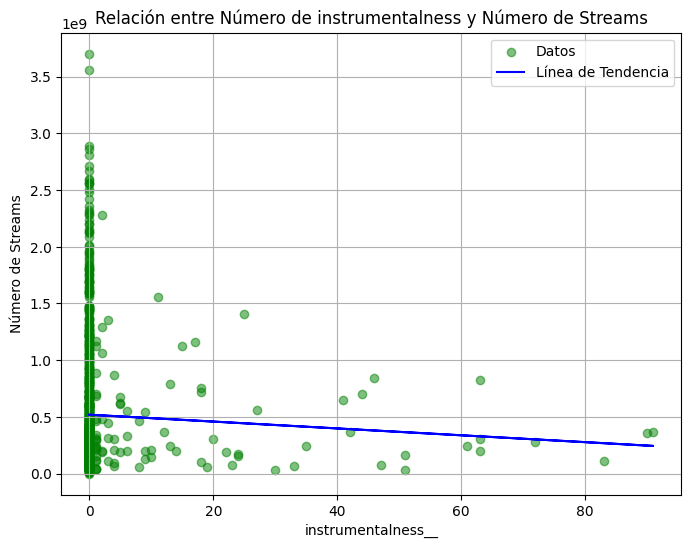

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustamos una línea de regresión lineal a los datos
coefficients = np.polyfit(df['instrumentalness__'], df['streams'], 1)
m = coefficients[0]  # Pendiente
b = coefficients[1]  # Intercepto

# Graficamos el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['instrumentalness__'], df['streams'], alpha=0.5, label='Datos', color = 'green')

# Añadimos la línea de regresión lineal al gráfico
plt.plot(df['instrumentalness__'], m * df['instrumentalness__'] + b, color='blue', label='Línea de Tendencia')

plt.title('Relación entre Número de instrumentalness y Número de Streams')
plt.xlabel('instrumentalness__')
plt.ylabel('Número de Streams')
plt.legend()
plt.grid(True)
plt.show()

## liveness
Dado que los datos no están distribuidos normalmente y se deseas determinar si las características de la música, en este caso la categoría de "liveness" (baja o alta), influyen en el éxito en términos de streams en Spotify, se puede aplicar un test no paramétrico llamado test de Mann-Whitney U. Este test es apropiado cuando tienes dos grupos (en este caso, "baja" y "alta" liveness) y quieres comparar si hay diferencias en una variable numérica (streams) entre los dos grupos.

**Hipótesis nula (H0):** No hay diferencias significativas en los streams entre las categorías de "baja" y "alta" liveness.

**Hipótesis alternativa (H1):** Hay diferencias significativas en los streams entre las categorías de "baja" y "alta" liveness.

**Consideraciones:**
- Este código calculará el test de Mann-Whitney U para comparar si hay diferencias significativas en los streams entre las categorías de "baja" y "alta" liveness. Si el valor p resultante es menor que el nivel de significancia (usualmente 0.05), se rechaza la hipótesis nula, lo que indica que hay diferencias significativas en los streams entre las dos categorías de liveness. De lo contrario, si el valor p es mayor que el nivel de significancia, no hay suficiente evidencia para afirmar que hay diferencias significativas.

In [ ]:
import pandas as pd
import scipy.stats as stats


# Dividimos los datos en dos grupos según la categoría de liveness
streams_baja = df[df['categoria_liveness'] == 'baixo']['streams']
streams_alta = df[df['categoria_liveness'] == 'alto']['streams']

# Realizamos el test de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(streams_baja, streams_alta)

# Imprimimos el resultado
print("Estadística del test:", statistic)
print("Valor p:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' liveness.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' liveness.")


Estadística del test: 104984.5
Valor p: 0.19693335931557332
No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' liveness.


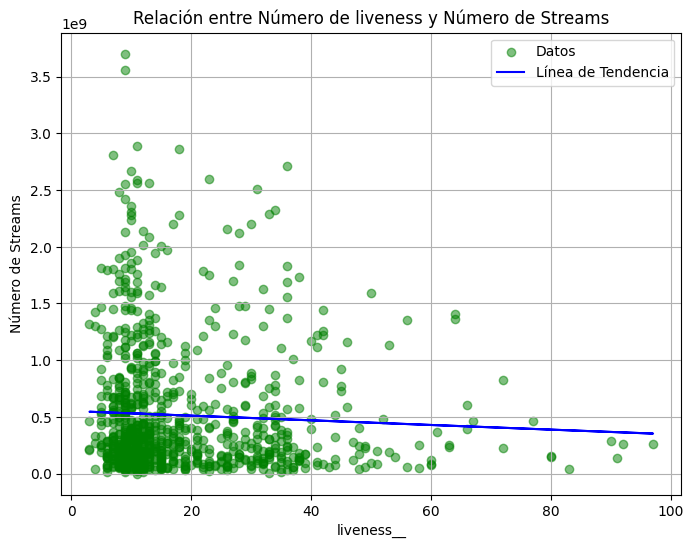

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustamos una línea de regresión lineal a los datos
coefficients = np.polyfit(df['liveness__'], df['streams'], 1)
m = coefficients[0]  # Pendiente
b = coefficients[1]  # Intercepto

# Graficamos el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['liveness__'], df['streams'], alpha=0.5, label='Datos', color = 'green')

# Añadimos la línea de regresión lineal al gráfico
plt.plot(df['liveness__'], m * df['liveness__'] + b, color='blue', label='Línea de Tendencia')

plt.title('Relación entre Número de liveness y Número de Streams')
plt.xlabel('liveness__')
plt.ylabel('Número de Streams')
plt.legend()
plt.grid(True)
plt.show()

## speechiness
Dado que tus datos no están distribuidos normalmente y se desea determinar si las características de la música, en este caso la categoría de "speechiness" (baja o alta), influyen en el éxito en términos de streams en Spotify, se puede aplicar un test no paramétrico llamado test de Mann-Whitney U. Este test es apropiado cuando se tiene dos grupos (en este caso, "baja" y "alta" speechiness) y se quiere comparar si hay diferencias en una variable numérica (streams) entre los dos grupos.

**Hipótesis nula (H0):** No hay diferencias significativas en los streams entre las categorías de "baja" y "alta" speechiness.

**Hipótesis alternativa (H1):** Hay diferencias significativas en los streams entre las categorías de "baja" y "alta" speechiness.

**Consideraciones:**
- Este código calculará el test de Mann-Whitney U para comparar si hay diferencias significativas en los streams entre las categorías de "baja" y "alta" speechiness. Si el valor p resultante es menor que el nivel de significancia (usualmente 0.05), se rechaza la hipótesis nula, lo que indica que hay diferencias significativas en los streams entre las dos categorías de speechiness. De lo contrario, si el valor p es mayor que el nivel de significancia, no hay suficiente evidencia para afirmar que hay diferencias significativas.

In [ ]:
import pandas as pd
import scipy.stats as stats

# Dividimos los datos en dos grupos según la categoría de speechiness
streams_baja = df[df['categoria_speechiness'] == 'baixo']['streams']
streams_alta = df[df['categoria_speechiness'] == 'alto']['streams']

# Realizamos el test de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(streams_baja, streams_alta)

# Imprimimos el resultado
print("Estadística del test:", statistic)
print("Valor p:", p_value)

# Interpretamos el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' speechiness.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' speechiness.")


Estadística del test: 107628.0
Valor p: 0.050522770885632146
No se rechaza la hipótesis nula. No hay diferencias significativas en los streams entre las categorías de 'baja' y 'alta' speechiness.


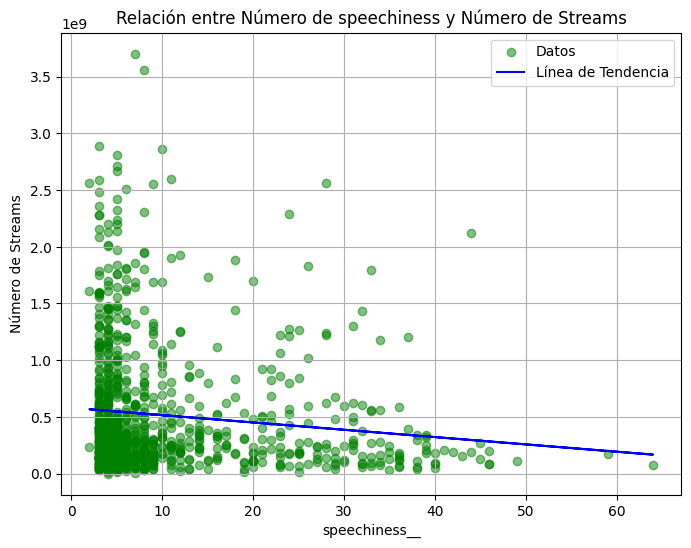

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ajustamos una línea de regresión lineal a los datos
coefficients = np.polyfit(df['speechiness__'], df['streams'], 1)
m = coefficients[0]  # Pendiente
b = coefficients[1]  # Intercepto

# Graficamos el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['speechiness__'], df['streams'], alpha=0.5, label='Datos', color = 'green')

# Añadimos la línea de regresión lineal al gráfico
plt.plot(df['speechiness__'], m * df['speechiness__'] + b, color='blue', label='Línea de Tendencia')

plt.title('Relación entre Número de speechiness y Número de Streams')
plt.xlabel('speechiness__')
plt.ylabel('Número de Streams')
plt.legend()
plt.grid(True)
plt.show()

# **Análisis de regresión**
Trata de establecer la "forma de de la relación entre las variables", es decir, se estudia la relación funcional entre las variables (y=f(x) o x=f(y)), de modo que podamos predecir el valor de una con base en la otra u otras. La variable o variables que son base de la predicción se llaman **variable o variables independientes** y la variable que se va a predecir se llama **variable dependiente**.

Vamos a construir un modelo predictivo, usando regresión lineal para machine learning.

## Regresao Linear
Para representar a relação entre uma variável dependente (y) e uma variável independente (x), usamos o modelo: Y = W0 + W1X

Para implementar um modelo de Regressão Linear com o scikit-learn, a gente tem encontrar os valores dos parâmetros W0 e W1 que melhor representam o relacionamento entre as variáveis.

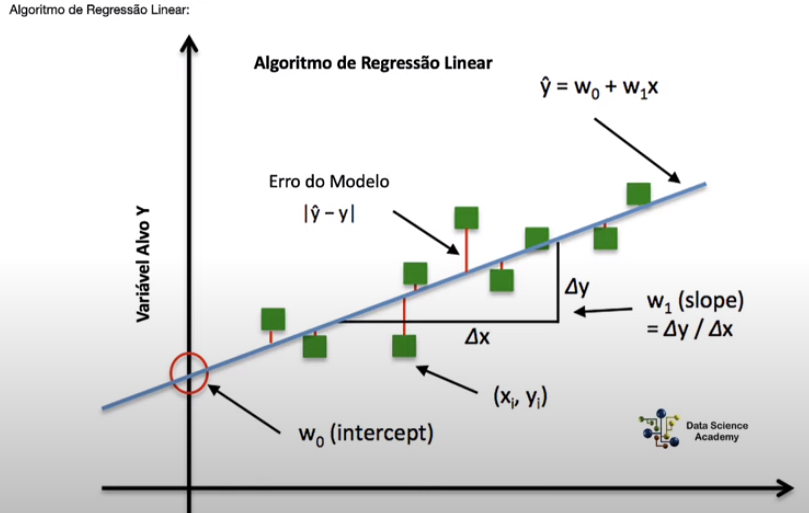

### **Hipótese 3: É possível prever a presença de uma música em um maior número de playlists está relacionada  com um maior número de streams?**






In [ ]:
# versao da linguagem Python
from platform import python_version
print('Versao da Linguagem Python: ', python_version())


Versao da Linguagem Python:  3.10.12


In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
# Poder trenar e testar o modelo, preciso dividir o conjunto de dados em duas amostras: a mostra de treino e de teste
from sklearn.model_selection import train_test_split

#### **Carregando os dados**

In [ ]:
# importando data
df = pd.read_csv ('/content/drive/MyDrive/Projeto2-Hipoteses/dataset_spotify_2023.csv')

In [ ]:
df.shape

(948, 43)

In [ ]:
df.columns

Index(['track_id_atualizado', 'track_name_clean', 'artist_s__name_clean',
       'count_songs', 'artist_count', 'released_year', 'released_month',
       'released_day', 'data_de_lancamento', 'streams', 'in_spotify_charts',
       'in_spotify_playlists', 'in_apple_charts', 'in_apple_playlists',
       'in_deezer_charts', 'in_deezer_playlists',
       'total_participation_in_playlist', 'bpm', 'danceability__', 'valence__',
       'energy__', 'acousticness__', 'instrumentalness__', 'liveness__',
       'speechiness__', 'terciles_streams', 'categoria_streams',
       'terciles_bpm', 'categoria_bpm', 'terciles_danceability__',
       'categoria_danceability', 'terciles_valence__', 'categoria_valence',
       'terciles_energy__', 'categoria_energy', 'terciles_acousticness__',
       'categoria_acousticness', 'terciles_instrumentalness__',
       'categoria_instrumentalness', 'terciles_liveness__',
       'categoria_liveness', 'terciles_speechiness__',
       'categoria_speechiness'],
      

In [ ]:
df.head()

,track_id_atualizado,track_name_clean,artist_s__name_clean,count_songs,artist_count,released_year,released_month,released_day,data_de_lancamento,streams,...,terciles_energy__,categoria_energy,terciles_acousticness__,categoria_acousticness,terciles_instrumentalness__,categoria_instrumentalness,terciles_liveness__,categoria_liveness,terciles_speechiness__,categoria_speechiness
0,3126367,viva la vida,coldplay,3,1,2008,1,1,2008-01-01,1592909789,...,2,baixo,1,baixo,1,baixo,2,baixo,1,baixo
1,8502696,riptide,vance joy,1,1,1975,1,1,1975-01-01,2009094673,...,2,baixo,3,alto,1,baixo,2,baixo,1,baixo
2,6161550,cupid twin ver fifty fifty spe,sped up 8282,1,1,1997,1,1,1997-01-01,103762518,...,2,baixo,3,alto,2,baixo,1,baixo,1,baixo
3,8576945,rockin around the christmas tree,brenda lee,1,1,1958,1,1,1958-01-01,769213520,...,1,baixo,3,alto,1,baixo,3,alto,2,baixo
4,6372609,jingle bell rock,bobby helms,1,1,1957,1,1,1957-01-01,741301563,...,1,baixo,3,alto,1,baixo,1,baixo,1,baixo


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   track_id_atualizado              948 non-null    int64 
 1   track_name_clean                 948 non-null    object
 2   artist_s__name_clean             948 non-null    object
 3   count_songs                      948 non-null    int64 
 4   artist_count                     948 non-null    int64 
 5   released_year                    948 non-null    int64 
 6   released_month                   948 non-null    int64 
 7   released_day                     948 non-null    int64 
 8   data_de_lancamento               948 non-null    object
 9   streams                          948 non-null    int64 
 10  in_spotify_charts                948 non-null    int64 
 11  in_spotify_playlists             948 non-null    int64 
 12  in_apple_charts                  948

#### **Análise exploratória - Resumo Estatístico**

In [ ]:
data = df[['total_participation_in_playlist', 'streams' ]]
print(data)


     total_participation_in_playlist     streams
0                              38226  1592909789
1                              32426  2009094673
2                                478   103762518
3                              15391   769213520
4                              10595   741301563
..                               ...         ...
943                              153     1365184
944                             1065   245400167
945                             2924   432719968
946                             1206   123122413
947                             1632   223319934

[948 rows x 2 columns]


In [ ]:
# Verifica se há valores ausentes
data.isnull().sum()

total_participation_in_playlist    0
streams                            0
dtype: int64

In [ ]:
#correlacao
# Variavel preditora: total_participation_in_playlist
# Variavel alvo(dependente) : streams => variável que eu quero prever
data.corr()

,total_participation_in_playlist,streams
total_participation_in_playlist,1.000000,0.783537
streams,0.783537,1.000000


In [ ]:
# Resumo estatístico do dataset
data.describe()

,total_participation_in_playlist,streams
count,948.000000,9.480000e+02
mean,5671.913502,5.143365e+08
std,8934.371888,5.677971e+08
min,34.000000,2.762000e+03
25%,914.500000,1.416362e+08
50%,2306.000000,2.891651e+08
75%,6006.250000,6.729425e+08
max,62623.000000,3.703895e+09


In [ ]:
# Resumo estatístico da variavél preditora(Nossa variavél de entrada)
data['total_participation_in_playlist'].describe()

count      948.000000
mean      5671.913502
std       8934.371888
min         34.000000
25%        914.500000
50%       2306.000000
75%       6006.250000
max      62623.000000
Name: total_participation_in_playlist, dtype: float64

<Axes: xlabel='total_participation_in_playlist', ylabel='Count'>

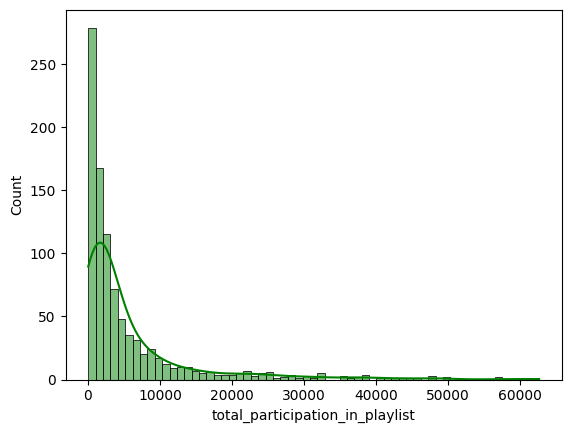

In [ ]:
# Histograma da variável preditora
# kde é a linha de densidade
sns.histplot(data = data, x = 'total_participation_in_playlist', kde = True, color = 'green')

#### **Preparacao dos Dados**

In [ ]:
# Prepara a variável de entrada X => formato de matriz
x = np.array(data['total_participation_in_playlist'])

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(948,)

In [ ]:
# Ajusta o shape de X
x = x.reshape(-1, 1)

In [ ]:
x.shape

(948, 1)

In [ ]:
# Prepara a variável alvo => formato de vetor
y = data['streams']

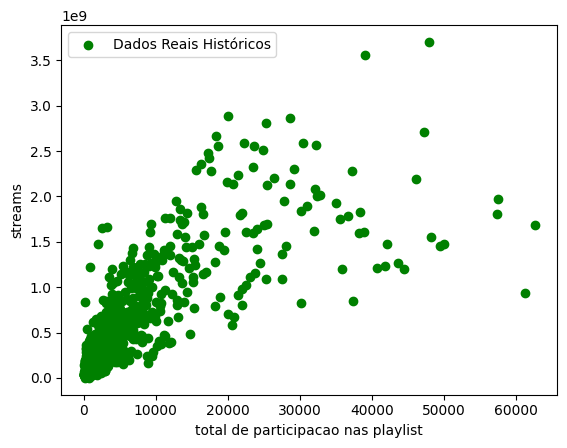

In [ ]:
# Grafico de dispersao entre x e y => Mosta a relacao entre as duas variaveis
plt.scatter(x, y, color = 'green', label = 'Dados Reais Históricos')
plt.xlabel('total de participacao nas playlist')
plt.ylabel('streams')
plt.legend()
plt.show()

In [ ]:
# Correlación lineal entre las dos variables
corr_test = pearsonr(x = data['total_participation_in_playlist'], y =  data['streams'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.7835372823802422
P-value:  1.0285341473229822e-197


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.78) y significativa (p-value = 1.0285341473229822e-197). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de streams en función de participación total en las playlist.

In [ ]:
# Dividir dados em treinamento y teste
# No puedo entrenar el modelo con todos los  datos, por eso se hace la división en entrenamiento y test.
# Voy a dividir x e y, la division seria 20% para datos de test y 80% para  datos de entreno.
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [ ]:
x_treino.shape


(758, 1)

In [ ]:
x_teste.shape

(190, 1)

In [ ]:
y_treino.shape

(758,)

In [ ]:
y_teste.shape

(190,)

#### **Modelagem Preditiva(Machine Learning)**
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Cria o modelo de regresao linear simples
# Criando objeto(instancia) "modelo"
modelo = LinearRegression()

In [ ]:
# Treina o model
# o metodo fit() faz o entrenamento con os dados historicos
modelo.fit(x_treino, y_treino)

LinearRegression()

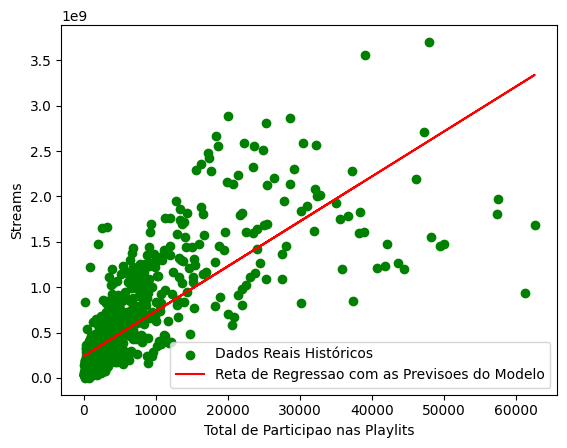

In [ ]:
# visualiza a reta de regressao linear(previsoes) e os dados reais usados no treinamento
plt.scatter(x, y, color = 'green', label = 'Dados Reais Históricos')
plt.plot(x, modelo.predict(x), color = 'red', label = 'Reta de Regressao com as Previsoes do Modelo')
plt.xlabel('Total de Participao nas Playlits')
plt.ylabel('Streams')
plt.legend()
plt.show()

In [ ]:
# Avaliar o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f'Coeficiente R^2: {score: .2f}')



Coeficiente R^2:  0.53


O que significa este valor? O r-quadrado é o coeficiente de determinação e ele expressa a porcentagem da variação da variável dependente que a variável independente explica corretamente.

Em outros paralavras, podemos dizer que o r-quadrado expressa o quanto o nosso modelo conseguiu explicar os dados. Seu valor varia entre 0 (o modelo não consegue explicar a relação entre as variáveis) até 100% (o modelo conseguiu explicar o relacionamento entre as variáveis).

O resultado que nós obtivemos foi de 53%, ou seja, nosso modelo conseguiu explicar a variação da variável dependente em 53% dos casos.

In [ ]:
# Intercepto - parametro w0
modelo.intercept_

238285095.0306177

In [ ]:
# Slope - parametro w1
modelo.coef_

array([49547.9432375])

#### **Deploy do modelo**
Usaremos o modelo para prever os streams com base na total participacao nas playlist

In [ ]:
# Define um novo para prever os streams por total paticipacao nas playlists.
# Preparando um novo valor para a variavel total_participation_in_playlist
total_participation_in_playlist_novo = np.array([[3000]])

# Faz previsao com o modelo  treinado
streams_previsto = modelo.predict(total_participation_in_playlist_novo)
streams_previsto_formateado = '{:,.2f}'.format(streams_previsto[0])
print(f'Se voce tem cerca de',total_participation_in_playlist_novo, 'playlists nas plataformas, seu streams pode ser igual a', streams_previsto_formateado)

Se voce tem cerca de [[3000]] playlists nas plataformas, seu streams pode ser igual a 386,928,924.74


In [ ]:
# Mesmo resultado anterior usando os parametros(coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1*x
streams = modelo.intercept_ + (modelo.coef_ * total_participation_in_playlist_novo)
print(streams)


[[3.86928925e+08]]


In [ ]:
# Definiendo outro valor para total_partipation_in_playlist
total_participation_in_playlist_novo = np.array([[10000]])

# Faz previsao com o modelo  treinado
streams_previsto = modelo.predict(total_participation_in_playlist_novo)
streams_previsto_formateado = '{:,.2f}'.format(streams_previsto[0])
print(f'Se voce tem cerca de',total_participation_in_playlist_novo, 'playlists nas plataformas, seu streams pode ser igual a', streams_previsto_formateado)


Se voce tem cerca de [[10000]] playlists nas plataformas, seu streams pode ser igual a 733,764,527.41


#### **Modelo**
Ecuacao da linea reta: Y = W0 + W1*X.
O modelo encontrado foi: streams = 238285095.0306177 + (49547.9432375*total_participation_in_playlist_novo)

In [ ]:
# Mesmo resultado anterior usando os parametros(coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1*x
streams = modelo.intercept_ + (modelo.coef_ * total_participation_in_playlist_novo)
print(streams)

[[7.33764527e+08]]


### **Hipotese 4: Artistas com um maior número de músicas no Spotify têm mais streams.**


#### **Importar librerias e datos**

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Poder trenar e testar o modelo, preciso dividir o conjunto de dados em duas amostras: a mostra de treino e de teste
from sklearn.model_selection import train_test_split

In [ ]:
#importando data
data = pd.read_csv ('/content/drive/MyDrive/Projeto2-Hipoteses/artist_songs.csv')
data.head()

,artist_s__name_clean,total_musicas,total_streams
0,coldplay,3,3825176058
1,vance joy,1,2009094673
2,sped up 8282,1,103762518
3,brenda lee,1,769213520
4,bobby helms,1,741301563


#### **Representación Gráfica**
El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.


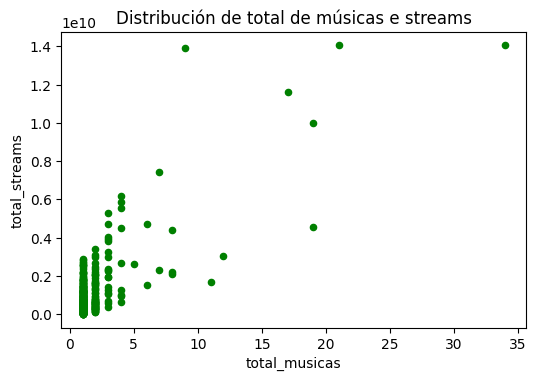

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

data.plot(
    x    = 'total_musicas',
    y    = 'total_streams',
    kind = "scatter",
    color = "green",
    ax   = ax
)
ax.set_title('Distribución de total de músicas e streams');

In [ ]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = data['total_musicas'], y =  data['total_streams'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.7789441982622812
P-value:  3.11374567674711e-132


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.7789441982622812) y significativa (p-value = 3.11374567674711e-132). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de streams en función del numero de músicas por artista.

#### **Preparacao dos Dados**

In [ ]:
# Prepara a variável de entrada X => formato de matriz
x = np.array(data['total_musicas'])


In [ ]:
# Ajusta o shape de X
x = x.reshape(-1, 1)

In [ ]:
# Prepara a variável alvo => formato de vetor
y = data['total_streams']

In [ ]:
# Dividir dados em treinamento y teste
# No puedo entrenar el modelo con todos los  datos, por eso se hace la división en entrenamiento y test.
# Voy a dividir x e y, la division seria 20% para datos de test y 80% para  datos de entreno.
#x_treino, x_teste, y_treino, y_teste = train_test_split(x.values.reshape(-1,1), y.values.reshape(-1,1), test_size = 0.2, random_state= 42)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [ ]:
#Precisa redimensionar os dados para fazer a regressão linear
#x_treino=x_treino.reshape(-1,1)
#y_treino=y_treino.reshape(-1,1)
#x_teste=x_teste.reshape(-1,1)
#y_teste=y_teste.reshape(-1,1)

#### **Modelagem Preditiva(Machine Learning)**
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Cria o modelo de regresao linear simples
# Criando objeto(instancia) "modelo"
modelo = LinearRegression()

In [ ]:
# Treina o model
# o metodo fit() faz o entrenamento con os dados historicos
modelo.fit(x_treino, y_treino)
#modelo.fit(x_treino.reshape(-1, 1), y = y_treino)

LinearRegression()

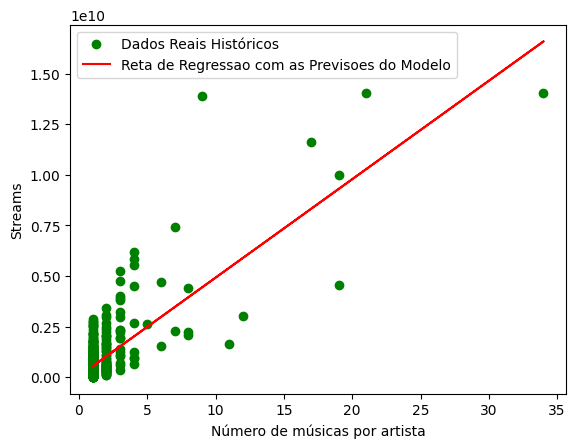

In [ ]:
# visualiza a reta de regressao linear(previsoes) e os dados reais usados no treinamento
plt.scatter(x, y, color = 'green', label = 'Dados Reais Históricos')
plt.plot(x, modelo.predict(x), color = 'red', label = 'Reta de Regressao com as Previsoes do Modelo')
plt.xlabel('Número de músicas por artista')
plt.ylabel('Streams')
plt.legend()
plt.show()

In [ ]:
# Avaliar o modelo nos dados de teste
score = modelo.score(x_teste, y_teste)
print(f'Coeficiente R^2: {score: .2f}')

Coeficiente R^2:  0.70


O que significa este valor? O r-quadrado é o coeficiente de determinação e ele expressa a porcentagem da variação da variável dependente que a variável independente explica corretamente.

Em outros palavras, podemos dizer que o r-quadrado expressa o quanto o nosso modelo conseguiu explicar os dados. Seu valor varia entre 0 (o modelo não consegue explicar a relação entre as variáveis) até 100% (o modelo conseguiu explicar o relacionamento entre as variáveis).

O resultado que nós obtivemos foi de 70%, ou seja, nosso modelo conseguiu explicar a variação da variável independente em 70% dos casos.

In [ ]:
# Intercepto - parametro w0
modelo.intercept_

65697215.520517945

In [ ]:
# Slope - parametro w1
modelo.coef_

array([4.85845309e+08])

#### **Deploy do modelo**
Usaremos o modelo para prever os streams com base na quantidade de musicas por artista

In [ ]:
# Define um novo para prever os streams por total de músicas.
# Preparando um novo valor para a variavel total_musicas
total_musicas_novo = np.array([[20]])

# Faz previsao com o modelo  treinado
streams_previsto = modelo.predict(total_musicas_novo)
streams_previsto_formateado = '{:,.2f}'.format(streams_previsto[0])
print(f'Se voce tem cerca de',total_musicas_novo, 'músicas no Spotify, seu streams pode ser igual a', streams_previsto_formateado)

Se voce tem cerca de [[20]] músicas no Spotify, seu streams pode ser igual a 9,782,603,393.69


#### **Modelo**
Ecuacao da linea reta: Y = W0 + W1*X.
O modelo encontrado foi: streams = 65697215.52051795 + (4.85845309e+08*total_musicas_novo)

In [ ]:
# Mesmo resultado anterior usando os parametros(coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1*x
streams = modelo.intercept_ + (modelo.coef_ * total_musicas_novo)
print(streams)

[[9.78260339e+09]]
